# Find the Bacon Number from movies database using Pandas

According to the theory of six degrees of seperation (see one of my very old [blogposts](https://shashindrasri.blogspot.com/2013/04/so-close-no-matter-how-far-six-degrees.html)), every human in the world can be reached via atmost six intermediate connections. You may not abe cquainted with Barrack Obama directly, but you will be able to find a friend (A) that knows another friend (B), that knows another friend (C), that knows another friend (D) who personally connected with Obama. In that case the number of connections between you and Obama would be five. The unproved theory is that, using only six such connections you can reach anyone in the world.

##Bacon Number

One easier way to check this theory would be to look at the connections in movies. The Bacon number of an actor is the number of degrees of separation he or she has from [Kevin Bacon](https://www.imdb.com/name/nm0000102/).
The [Bacon number](https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon#:~:text=The%20Bacon%20number%20of%20an,Kevin%20Bacon%20the%20actor%20is.) is calculated as follows.

*   Kevin Bacon himself has a Bacon number of 0.
*   Those actors who have worked directly with Kevin Bacon have a Bacon number of 1.
*   If the lowest Bacon number of any actor with whom X has appeared in any movie is N, X's Bacon number is N+1.






##Objective

Objective of this notebook is to calculate the Bacon number for all the cast members in the database. Then we'll try to find the maximum such number. This will help to verify whether six degrees of seperation is valid for the movie cast data. 

##Dataset

The cast.csv.zip file is obtained through Brandon Rhodes [Pandas tutorials](https://github.com/brandon-rhodes/pycon-pandas-tutorial/tree/998a4539ce9856010d4bb238de74cefe12b1d883). You can also find the file [here](https://github.com/shashi3876/data-wrangling).

### Setting up Pandas and other packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.__version__

'1.3.5'

## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`



In [2]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [3]:
cast.sample(5)

,title,year,name,type,character,n
3612097,Dudes,1987,Catherine Mary Stewart,actress,Jessie,10.0
1249158,Povest o lesnom velikane,1954,Viktor Kulakov,actor,Nazarka,NaN
2233846,Huang tu di,1984,Tuo Tan,actor,The father,4.0
1515093,Pirates of the Plain,1999,Tertius Meintjes,actor,Fergus,18.0
2254297,Le calde notti di Lady Hamilton,1968,Lorenzo Terzon,actor,Lord Charles Greville,7.0


### Is movie name a goood key to identify each movie ?


In [4]:
print(f'All the unique movie names')
#print(cast.title.value_counts())
print(f'There are {len(cast.title.value_counts())} unique movie names')

All the unique movie names
There are 182675 unique movie names


In [5]:
movie_year_df=cast.groupby(['title','year'])['name'].count().sort_values(ascending=False);
print(f'There are {len(movie_year_df)} unique movies')

There are 199219 unique movies


**Comment:**
Based on the above observations, both title and year is required to uniquely identify each movie. So now let's add a movie column which is a concatanation of the title and the year. This column can be used to identify a movie.

In [6]:
#print(cast.year)
cast["movie"]=cast["title"]+" ("+cast["year"].astype("str")+")"
print(cast.sample(5))

                                          title  year                 name  \
696830                             The Last Hit  2013       Thomas Falborn   
3478081  Todo el mundo tiene a alguien menos yo  2012    Paola Torres Rico   
700861                           Messi and Maud  2017     Crist?bal Farias   
2652590                         Hello Au Revoir  2018  Isabelle (II) Bonin   
1091651                            Peulraenmaen  2014           Gwang Jang   

            type        character    n  \
696830     actor  Man with Goatee  NaN   
3478081  actress           MariJo  6.0   
700861     actor            Messi  NaN   
2652590  actress     Jade Mermaid  NaN   
1091651    actor    Goo Sang-yoon  NaN   

                                                 movie  
696830                             The Last Hit (2013)  
3478081  Todo el mundo tiene a alguien menos yo (2012)  
700861                           Messi and Maud (2017)  
2652590                         Hello Au Revoir (2

### Lets see the number of movies Kevin Bacon has featured in.


In [7]:
kevin_df=cast[cast['name']=="Kevin Bacon"];
#print(kevin_df)
kevin_df.drop_duplicates("movie",inplace=True)
print(kevin_df)

                       title  year         name   type        character  \
110644        A Few Good Men  1992  Kevin Bacon  actor  Capt. Jack Ross   
110645          Animal House  1978  Kevin Bacon  actor      Chip Diller   
110646             Apollo 13  1995  Kevin Bacon  actor     Jack Swigert   
110647                 Balto  1995  Kevin Bacon  actor            Balto   
110648           Beauty Shop  2005  Kevin Bacon  actor            Jorge   
...                      ...   ...          ...    ...              ...   
110704      We Married Margo  2000  Kevin Bacon  actor          Himself   
110705  Where the Truth Lies  2005  Kevin Bacon  actor            Lanny   
110706    White Water Summer  1987  Kevin Bacon  actor              Vic   
110707           Wild Things  1998  Kevin Bacon  actor     Ray Duquette   
110708        X: First Class  2011  Kevin Bacon  actor   Sebastian Shaw   

            n                        movie  
110644    4.0        A Few Good Men (1992)  
110645   

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### What is the distribution of Kevin Bacon movies over the years




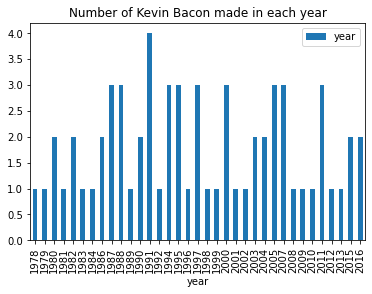

In [8]:
kevin_df_movie=kevin_df.groupby(['year']).agg({'year':'count'})
#print(kevin_df_movie)
#print(kevin_df_movie['year'])
kevin_df_movie.plot(kind="bar",title="Number of Kevin Bacon made in each year")

## How many actors/actresses have worked with Kevin Bacon directly ?

First lets find the cast of all movies that was featured by Kevin Bacon.

In [9]:
#ind2=kevin_df_movie.set_index(['title','year']).index
kevin_movie=kevin_df.movie.tolist()
print(kevin_movie)
#ind1=cast.set_index(['title','year']).index
kevin_cast=cast[cast["movie"].isin(kevin_movie)]


['A Few Good Men (1992)', 'Animal House (1978)', 'Apollo 13 (1995)', 'Balto (1995)', 'Beauty Shop (2005)', 'Black Mass (2015)', 'Cavedweller (2004)', 'Cop Car (2015)', 'Crazy, Stupid, Love. (2011)', 'Criminal Law (1988)', 'Death Sentence (2007)', 'Digging to China (1997)', 'Diner (1982)', 'Elephant White (2011)', 'End of the Line (1987)', 'Enormous Changes at the Last Minute (1983)', 'Flatliners (1990)', 'Footloose (1984)', 'Forty Deuce (1982)', 'Friday the 13th (1980)', 'Frost/Nixon (2008)', 'He Said, She Said (1991)', 'Hero at Large (1980)', 'Hollow Man (2000)', 'In the Cut (2003)', "Jayne Mansfield's Car (2012)", 'JFK (1991)', 'Lemon Sky (1988)', 'Loverboy (2005)', 'Murder in the First (1995)', 'My Dog Skip (2000)', 'My One and Only (2009)', 'Mystic River (2003)', 'New York Skyride (1994)', 'Novocaine (2001)', 'Only When I Laugh (1981)', 'Patriots Day (2016)', 'Picture Perfect (1997)', 'Planes, Trains & Automobiles (1987)', 'Pyrates (1991)', 'Queens Logic (1991)', 'Quicksilver (1986

In [10]:
print(f'There are {len(kevin_cast.name.unique())} different actors/actresses who have starred with Kevin bacon across various movies.\nAltogether there are {len(cast.name.unique())} actors/actressses')

There are 3537 different actors/actresses who have starred with Kevin bacon across various movies.
Altogether there are 1394048 actors/actressses


That's a lot of people with a Bacon number of 1. 

## Use of Dijkstra's algorithm



Now it's time to start the Dijkstra's algorithm. To run the algorithm, we generate two data frames which maps actor to all the movies he has appeared in (actor-movie_df) and movie to all the actors that appeared in that movie (movie_actor_df). These data frame will be utilized to run the Dijkstra's algorithm in the next step.

In [11]:
actor_movie_df=cast.groupby("name").agg({'movie':lambda x: list(pd.unique(x))})
movie_actor_df=cast.groupby("movie").agg({'name':lambda x: list(pd.unique(x))})

In [12]:
print((list(movie_actor_df.loc["Giordano Bruno (1973)"])))

[['Hans Christian Blech', 'Mark Burns', 'Mathieu Carri?re', 'Massimo Foschi', 'Giuseppe Maffioli', 'Renato Scarpa', 'Gian Maria Volont?', 'Charlotte Rampling']]


Now we'll start the Dijkstra's algorithm. We'll use a priority queue to hold the visited nodes. also we initialize the distance and prev dictionaries to keep the bacon number and the best previous node to that cast member. These two dictionaires are initialized with infinity an None.

In [13]:
from queue import PriorityQueue
import math
unvisited=set(cast.name.unique());
distance={}
prev={}
for i in unvisited:
  distance[i]=math.inf;
  prev[i]='None';

#set the Bacon number for Kevin Bacon
distance["Kevin Bacon"]=0;
prev["Kevin Bacon"]='Origin';

pq = PriorityQueue()
pq.put((0, "Kevin Bacon"))
unvisited.remove('Kevin Bacon')

val=1;

while not pq.empty():
  (val, current_vertex) = pq.get();
  movie_list=list(actor_movie_df.loc[current_vertex]);
  actor_list=[];
  for i in movie_list[0]:
    actor_list.extend(list(movie_actor_df.loc[i])[0]);
  for actor in actor_list:
    if actor in unvisited:
      distance[actor]=val+1;
      prev[actor]=current_vertex;
      pq.put((val+1,actor));
      unvisited.remove(actor);


Now lets make a data frame out of the dictionaries and have a look at the histomgram. To display, replace infinity with -1 meaning that there is no path towards these cast members from Kevin bacon.


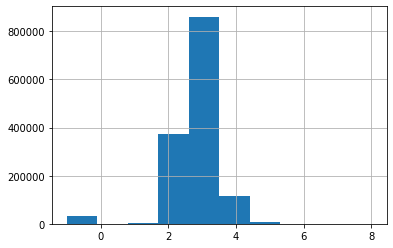

In [14]:
actor_names=[];
actor_dist=[];
actor_movies=[];
for key, value in distance.items():
  actor_names.append(key);
  actor_dist.append(value);
  actor_movies.append(len(list(actor_movie_df.loc[key])[0]));

temp_dict={'Name':actor_names,'Bacon number':actor_dist,'Movies':actor_movies};

data=pd.DataFrame(temp_dict);
data.replace(math.inf,-1,inplace=True)
data['Bacon number'].hist()



## Analysis of the results

Here we are trying to find if there are any interesting observations about the Bacon number.


1.   Is there any cast member who is not connected to Kevin Bacon (ultimately a user with an infinite Bacon number)
2.   If there are no such users what is the highest Bacon number for the cast members named in our data
3.   What is the relationship between the number of movies a cast member appeared in vs their Bacon number ? (ie. does appearing in more movies corresponds to a lower Bacon number)
4.   List item





**Q. Is there any cast member who is not connected to Kevin Bacon (ultimately a user with an infinite Bacon number)**

A. Yes. There were 33407 cast members with no connection with kevin Bacon. Lets see how many movies they have appeared in.

In [15]:
disconnected_cast=data[data['Bacon number']==-1]
disconnected_cast.sample(5)

,Name,Bacon number,Movies
1385181,Molly Kruger,-1.0,2
525234,Yangjie Baima,-1.0,1
220489,Daniello Zwiebackpapst,-1.0,1
749522,Milan (II) Lukes,-1.0,1
880718,Khosro Hassanzadeh,-1.0,1


Seems like they have only appeared in single movie. Lets see the distribution of number of movies for these cast members.

1    32302
2      904
3      131
4       52
5        8
6        6
7        3
8        1
Name: Movies, dtype: int64

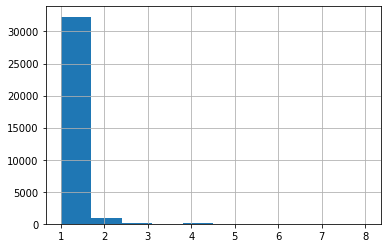

In [16]:
disconnected_cast['Movies'].hist()
disconnected_cast['Movies'].value_counts().sort_index()

Altohugh most of them appeared in a single movie, some cast members have apperead in 8 movies and yet have no connection with Kevin Bacon. Lets see who these cast members are.

In [17]:
disconnected_cast[disconnected_cast['Movies']>4].sort_values('Movies',ascending=False).head(5)

,Name,Bacon number,Movies
621305,Douglas (II) Reese,-1.0,8
862774,Jonathon Ash,-1.0,7
819339,Assia Dagher,-1.0,7
415424,Gabriel (II) Michael,-1.0,7
43486,Jackson Buscher,-1.0,6


In [18]:
print(list(actor_movie_df.loc["Tyler (V) Olson"]))
print(list(actor_movie_df.loc["Mary Queeny"]))
print(list(actor_movie_df.loc["Douglas (II) Reese"]))

[['A School Poltergeist (2015)', 'Carrie and Jerry (2015)', 'Elijah (2014)', 'Pushed Too Far (2015)', 'The Cretaceous City (2018)']]
[['Banknote (1936)', 'Bint el-bacha el-moudir (1938)', 'Chagarat al-dorr (1935)', 'Endama toheb el maraa (1933)', 'Uyun sahira (1934)', 'Zawja bil nayaba (1937)']]
[['Blue Guitar (2016)', 'Digital Invasion (2010)', 'Maysville (2015)', 'Migraine (2017)', 'Nessa (2015)', 'The Supporter (2008)', 'The Vaughn Sister (2010)', 'Warwick (2016)']]


Some of the above cast members seems to have apperead in quite a few movies, but we were unable to find a connection. However, some actor names have numeral values in their names such as (II) or (V), so it may be one reason for not finding a connection. (may be they use other names).

Also when cross-checked with [this website](https://oracleofbacon.org/) which gives the connection to Kevin Bacon, it showed that Bacon number for "Mary Queeny" is 4. However, the connection to Kevin Bacon occurs via the movie "Mister Roberts (1984)" which does not appear in our daat set. So another reason would be missing data in our data set.

Also some names such as 'Mimo Garcia' does not appear in the above website. This validates our finding that the Bacon number is infinity for this cast member.

**Q.  What is the higest (non infinite) Bacon number for the cast members in our data.**

A. We had three cast members with Bacon number 8 and 64 cast members with bacon number 7.

In [19]:
high_bacon_number_df=data[data["Bacon number"]>=7]
high_bacon_number_df.sort_values("Bacon number",ascending=False).head(5)

,Name,Bacon number,Movies
12843,Agnes P?ndy,8.0,1
234355,Aura (V),8.0,1
899449,G?nter Schickert,8.0,1
851297,Nachalnik na sofiyskata pozharna comanda Zahar...,7.0,1
908811,Mila Savova,7.0,1


1    66
2     1
Name: Movies, dtype: int64

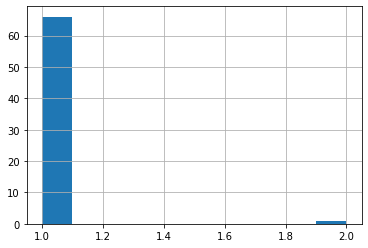

In [20]:
high_bacon_number_df['Movies'].hist()
high_bacon_number_df['Movies'].value_counts().sort_index()

As expected, almost all the cast members have only appeared in one or two movies. Thus the probability of having a lower Bacon number for these cast members is low.

**Q. What is the relationship between the number of movies a cast member appeared in vs their Bacon number ? (ie. does appearing in more movies corresponds to a lower Bacon number)**

Lets analyse this problem by first removing the infinity values from our data.

In [21]:
non_inf_data=data[data["Bacon number"]!=-1]
non_inf_data.head()

,Name,Bacon number,Movies
0,Noshirwan Jehangir,3.0,3
1,Henry Oyasato,3.0,1
2,Isabelle Haase,4.0,1
3,Teddo November,2.0,5
4,Thupten Gyatso,2.0,1


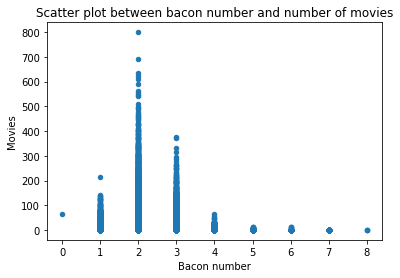

In [22]:
non_inf_data.plot.scatter(x='Bacon number', y='Movies', title= "Scatter plot between bacon number and number of movies");

In [23]:
non_inf_data["Movies"].corr(non_inf_data["Bacon number"])

-0.155846051249101

This gives us a negative correlation value, confirming that appering in a higher number of movies results in a lower Bacon number. Also it should be noted that we have dropped the cast members who had a infinite bacon number. if we include them here, the correlation index will reduce further.

## Conclusion

Here we used a cast data set to calculate the Bacon number for all the cast members availble. We used Dijkstra's algorithm. The six degrees of separation principle did not seem to be applied to some cast members as there were around 33000 cast memebrs with no connection to Kevin Bacon and another 67 members with a Bacon number higher than 6. However, when compared with the total number of cast members (ie. 1394048), the above mentioned values were a very small percentage (0.23 %). Thus, we can conclude that for most cases the six degrees of separation will be achievable.


## References



1.   [Six degrees of Kevin Bacon](https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon#:~:text=The%20Bacon%20number%20of%20an,Kevin%20Bacon%20the%20actor%20is.) 
2.   [Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)
3.   [The Oracle of Bacon](https://oracleofbacon.org/)
4.  [Pycon Pandas Tutorial](https://github.com/brandon-rhodes/pycon-pandas-tutorial/tree/998a4539ce9856010d4bb238de74cefe12b1d883) by Brandon Rhodes
